In [1]:
include("AudioNMF.jl");
using .AudioNMF

In [2]:
using Plots;
using Statistics;

In [3]:
V,S = audio_to_V("data/tetris_piano_mono.wav");

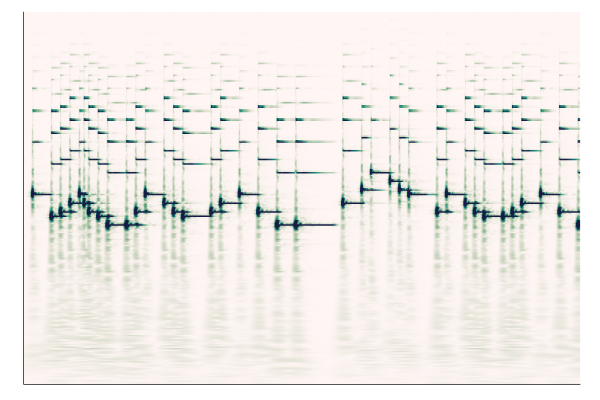

In [4]:
q = quantile(vec(V[:,1:5000]),0.99);
heatmap(V[:,1:5000], clims = (0,q), legend=:none, xaxis=nothing, yaxis=nothing, color=:tempo)

In [5]:
num_components = 24;
W, H = nmf(V,num_components,2048,true);
W, H, f0, W2, H2, f02, W3, H3, midi_nn = rearrange_components(W,H);

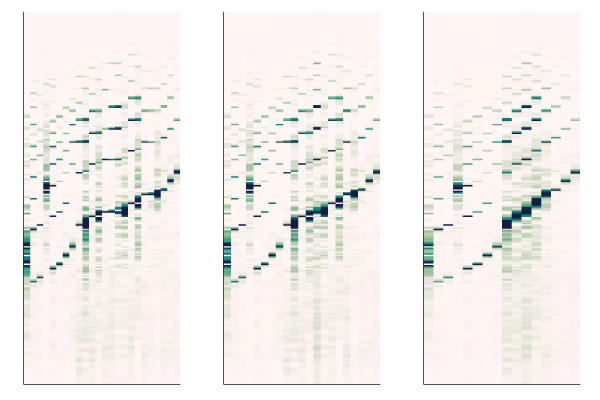

In [6]:
q = quantile(vec(W),0.99); h1 = heatmap(W, clims = (0,q), legend=:none, xaxis=nothing, yaxis=nothing, color=:tempo);
q = quantile(vec(W2),0.99); h2 = heatmap(W2, clims = (0,q), legend=:none, xaxis=nothing, yaxis=nothing, color=:tempo);
q = quantile(vec(W3),0.99); h3 = heatmap(W3, clims = (0,q), legend=:none, xaxis=nothing, yaxis=nothing, color=:tempo);
plot(h1,h2,h3,layout = (1,3))

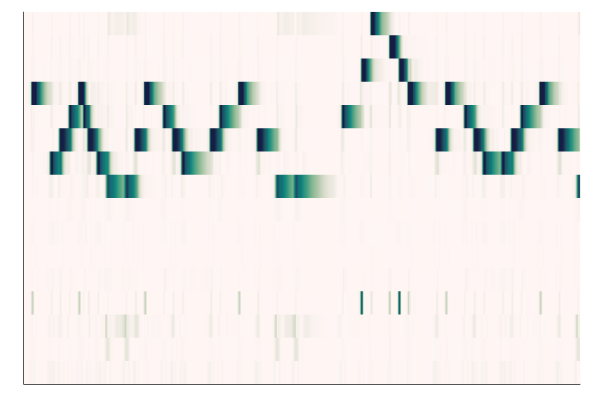

In [7]:
q = quantile(vec(H3),0.99); 
heatmap(H3[:,1:5000], clims = (0,q), legend=:none, xaxis=nothing, yaxis=nothing, color=:tempo)

In [8]:
split1 = floor(Int64,size(W,2)/3);
split2 = floor(Int64,size(W,2)*2/3);
ind1 = 1:split1;
ind2 = (split1+1):split2;
ind3 = (split2+1):size(W,2);

Vhat = W[:,ind1]*H[ind1,:];
V_to_audio(Vhat,copy(S),"test1.wav")
Vhat = W[:,ind2]*H[ind2,:];
V_to_audio(Vhat,copy(S),"test2.wav")
Vhat = W[:,ind3]*H[ind3,:];
V_to_audio(Vhat,copy(S),"test3.wav")